# import required libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import json
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, TopKCategoricalAccuracy, sparse_top_k_categorical_accuracy

# Setup Environment

In [12]:
img_size= (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 64
epochs = 30

# Load Original Image data

In [13]:
directory="D:/rice_disease_detection/dataset/Original_dataset"

In [14]:
train_data = tf.keras.utils.image_dataset_from_directory(directory=directory,
                                                  labels='inferred',
                                                  label_mode='categorical',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=img_size,
                                                  seed=seed,
                                                  validation_split=0.3,
                                                  subset='training',
                                                  )

Found 25144 files belonging to 10 classes.
Using 17601 files for training.


In [15]:
val_data = tf.keras.utils.image_dataset_from_directory(directory=directory,
                                                  labels='inferred',
                                                  label_mode='categorical',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=img_size,
                                                  seed=seed,
                                                  validation_split=0.3,
                                                  subset='validation',
                                                  )

Found 25144 files belonging to 10 classes.
Using 7543 files for validation.


# Rescale Images

In [16]:
# Apply rescaling using the Rescaling layer
train_data=train_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
val_data=val_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# Create Model

In [17]:
# Define Model

model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape_3D))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 74, 74, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       256,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,472 (2.57 MB)

 Trainable params: 674,472 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [18]:
# Define the model with optimizer , loss , metrics
model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
history = model.fit(train_data,
                    epochs=3,
                    validation_data=val_data,
                    callbacks=[early_stopping],
                    verbose=1,
                    shuffle=True)

Epoch 1/3
551/551 ━━━━━━━━━━━━━━━━━━━━ 1057s 2s/step - accuracy: 0.2197 - loss: 1.9840 - val_accuracy: 0.3725 - val_loss: 1.5349
Epoch 2/3
551/551 ━━━━━━━━━━━━━━━━━━━━ 831s 2s/step - accuracy: 0.4066 - loss: 1.4713 - val_accuracy: 0.5539 - val_loss: 1.1932
Epoch 3/3
551/551 ━━━━━━━━━━━━━━━━━━━━ 842s 2s/step - accuracy: 0.5584 - loss: 1.1876 - val_accuracy: 0.6515 - val_loss: 0.9329


# Evaluate Model's Performance

KeyError: 'precision'

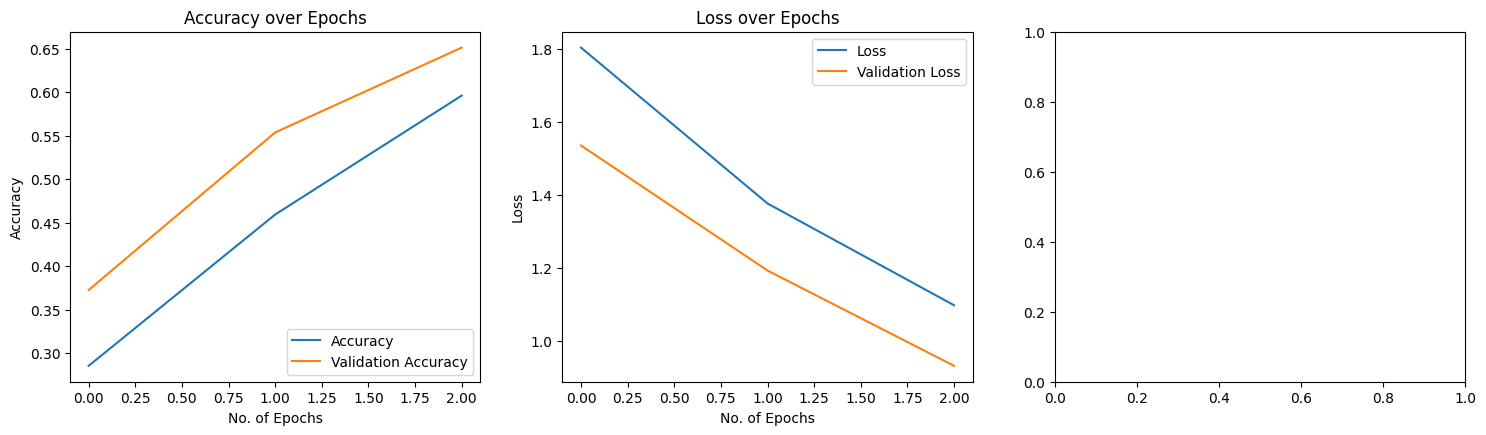

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

# Plot Accuracy
plt.subplot(2, 3, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy over Epochs")

# Plot Loss
plt.subplot(2, 3, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Loss over Epochs")

# Plot Precision
plt.subplot(2, 3, 3)
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel("No. of Epochs")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.title("Precision over Epochs")

# Plot Recall
plt.subplot(2, 3, 4)
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel("No. of Epochs")
plt.ylabel("Recall")
plt.legend(loc="lower right")
plt.title("Recall over Epochs")

# Plot Top-k Categorical Accuracy
plt.subplot(2, 3, 5)
plt.plot(history.history['top_k_categorical_accuracy'], label='Top-1 Accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Validation Top-1 Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Top-1 Accuracy")
plt.legend(loc="lower right")
plt.title("Top-1 Accuracy over Epochs")

plt.tight_layout()
plt.show()



In [ ]:
# print Accuracy

test_Accuracy = model.evaluate(val_data)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

236/236 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.4862 - loss: 1.2971 - precision: 0.7125 - recall: 0.2860 - top_k_categorical_accuracy: 0.8360
Model's Accuracy : 48.38923513889313


# Best Wieghts

In [ ]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_weights = model.get_weights()

print(f"Best weights were obtained at epoch {best_epoch}")
print("Best Weights:", best_weights)

Best weights were obtained at epoch 2
Best Weights: [array([[[[-2.17742831e-01, -5.84714301e-02, -1.22028261e-01,
          -3.33734117e-02, -1.08118281e-01, -9.90756452e-02,
           2.01475024e-01, -6.70168400e-02,  1.75153226e-01,
          -2.53975913e-02, -1.35465488e-01, -6.05065934e-02,
           6.76364452e-02,  1.51470140e-01,  6.89022616e-02,
          -7.23268762e-02],
         [-1.69665828e-01,  5.96231110e-02,  5.37261739e-02,
          -9.61700156e-02, -6.58113211e-02, -1.77319586e-01,
          -4.89849523e-02,  1.39243230e-01, -1.48421824e-01,
           1.01177178e-01, -1.05251767e-01,  1.12154096e-01,
           1.20569251e-01,  2.74532419e-02,  1.18624642e-01,
           7.94750080e-02],
         [-3.51252928e-02,  2.04256013e-01,  6.22673966e-02,
           1.46082908e-01, -3.35854688e-03,  1.85557976e-01,
           1.84223250e-01, -1.76104710e-01, -1.93220124e-01,
           9.07313600e-02, -8.59263390e-02, -6.59073591e-02,
           1.22869657e-02,  7.0119351

# Checking Labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Iterate over the batches of images and labels from train_data
for images, labels in train_data.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow((images[i].numpy() * 255).astype('uint8'))

        # Convert one-hot encoded label to integer index
        label_index = np.argmax(labels[i].numpy())
        plt.title(class_names[label_index])

        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
class_indices = {index: name for index, name in enumerate(class_names)}

In [ ]:
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)